## Linear Regression and Learning Curve challenges

`Topic:      Challenge Set 6
Subject:    Linear Regression and Learning Curve challenges
Date:       01/28/17
Name:       Sungwan Kim`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

/Users/sungwankim/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sungwankim/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Challenge 1
Generate (fake) data that is linearly related to $log(x)$.

You are making this model up. It is of the form $\beta_{0} + \beta_{1}log(x) + \epsilon$. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

* quadratic (second degree polynomial)
* logarithmic ($log(x)$)

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
np.random.seed(11)
def f(x):
    return np.log(x) + 5
X = np.random.uniform(0, 1, size = 100)[:, np.newaxis]  # force matrix
y = f(X) + np.random.normal(scale = 0.3, size = 100)[:, np.newaxis]

In [3]:
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept = False))
est.fit(X, y)
est.score(X, y)

0.8749158343991223

In [4]:
log_X = np.log(X)
lr = LinearRegression()
lr.fit(log_X, y)
lr.score(log_X, y)

0.9342794210170648

### Challenge 2
Generate (fake) data from a model of the form $\beta_{0} + \beta_{1}x + \beta_{2} x^2 + \epsilon$. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [5]:
np.random.seed(11)
def f(x):
    return x ** 2 + 3 * x + 5
X = np.random.uniform(0, 1, size = 100)[:, np.newaxis]  # force matrix
y = f(X) + np.random.normal(scale = 0.3, size = 100)[:, np.newaxis]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept = False))
est.fit(X_train, y_train)
train_error = mean_squared_error(y_train, est.predict(X_train))
test_error = mean_squared_error(y_test, est.predict(X_test))
train_error

0.06333832121141522

In [7]:
test_error

0.11073858315314192

### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term $x^7$). Over the x axis of model degree (8 points), plot:

* training error
* test error
* $R^2$
* AIC

In [8]:
def plot_approximation(est, ax, label = None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label = 'ground truth', color = 'green')
    ax.scatter(X, y, s = 100)   # our data 
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color = 'red', label = label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc = 'upper right', frameon = True)

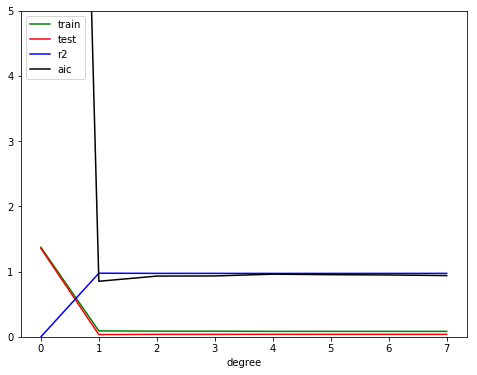

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
train_error = np.empty(8)
test_error = np.empty(8)
r2 = np.empty(8)
aic = np.empty(8)
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    r2[degree] = est.score(X_test, y_test)
    aic[degree] = sum((y_test - est.predict(X_test)) ** 2)
    

# Plot the training and test errors against degree
plt.figure(figsize = (8,6))
plt.plot(np.arange(8), train_error, color = 'green', label = 'train')
plt.plot(np.arange(8), test_error, color = 'red', label = 'test')
plt.plot(np.arange(8), r2, color = 'blue', label = 'r2')
plt.plot(np.arange(8), aic, color = 'black', label = 'aic')
plt.ylim((0.0, 5))
plt.xlabel('degree')
plt.legend(loc = 'upper left');

### Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

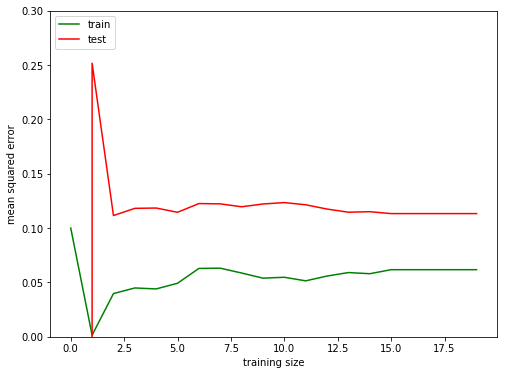

In [10]:
train_error = np.empty(20)
test_error = np.empty(20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
for i in range(5, 100, 5):
    X_train2, y_train2 = X_train[:i], y_train[:i]
    est = make_pipeline(PolynomialFeatures(2), LinearRegression())
    est.fit(X_train2, y_train2)
    train_error[i//5] = mean_squared_error(y_train2, est.predict(X_train2))
    test_error[i//5] = mean_squared_error(y_test, est.predict(X_test))
    
# Plot the training and test errors against degree
plt.figure(figsize = (8,6))
plt.plot(np.arange(20), train_error, color = 'green', label = 'train')
plt.plot(np.arange(20), test_error, color = 'red', label = 'test')
plt.ylim((0.0, 0.3))
plt.ylabel('mean squared error')
plt.xlabel('training size')
plt.legend(loc = 'upper left');